[UTK Face Dataset Information](https://susanqq.github.io/UTKFace/)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import ast
import seaborn as sns

In [2]:
!pwd

/home/anhduy/face-attributes/notebooks


In [3]:
DATA_PATH = '/home/Data/UTK_Face_Dataset/'

RAW = os.path.join(DATA_PATH, 'raw/UTKface_inthewild')
CSV = os.path.join(DATA_PATH, 'processed')
CROPPED = os.path.join(DATA_PATH, 'interim')

In [20]:
raw_1 = os.path.join(RAW, 'part1/')
raw_2 = os.path.join(RAW, 'part2/')
raw_3 = os.path.join(RAW, 'part3/')

csv_1 = os.path.join(CSV, 'part1/utk_face.csv')
csv_2 = os.path.join(CSV, 'part2/utk_face.csv')
csv_3 = os.path.join(CSV, 'part3/utk_face.csv')

cropped_1 = os.path.join(CROPPED, 'part1/cropped/')
cropped_2 = os.path.join(CROPPED, 'part2/cropped/')
cropped_3 = os.path.join(CROPPED, 'part3/cropped/')

In [21]:
df_1 = pd.read_csv(csv_1)
df_2 = pd.read_csv(csv_2)
df_3 = pd.read_csv(csv_3)

In [22]:
df_utk = pd.concat([df_1, df_2, df_3])
df_utk.reset_index(drop=True, inplace=True)

In [25]:
df_utk

,file_name,age,gender
0,/home/Data/UTK_Face_Dataset/interim/part1/crop...,14.0,0
1,/home/Data/UTK_Face_Dataset/interim/part1/crop...,22.0,0
2,/home/Data/UTK_Face_Dataset/interim/part1/crop...,32.0,0
3,/home/Data/UTK_Face_Dataset/interim/part1/crop...,69.0,0
4,/home/Data/UTK_Face_Dataset/interim/part1/crop...,36.0,1
...,...,...,...
22829,/home/Data/UTK_Face_Dataset/interim/part3/crop...,43.0,0
22830,/home/Data/UTK_Face_Dataset/interim/part3/crop...,65.0,1
22831,/home/Data/UTK_Face_Dataset/interim/part3/crop...,46.0,1
22832,/home/Data/UTK_Face_Dataset/interim/part3/crop...,90.0,0


In [26]:
race = {
    0:'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

In [28]:
df_utk['race'] = df_utk['file_name'].apply(lambda x: race.get(int(x.split('/')[-1].split('.')[0].split('_')[2]), 'Unknown'))

In [46]:
def visualize_batch(image_ids, features):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, features)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(CROPPED, image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Age: {label[0]}, Gender: {'Male' if int(label[1]) == 1 else 'Female'}, Race: {label[2]}", fontsize=12)
        plt.axis("off")
    
    plt.show()

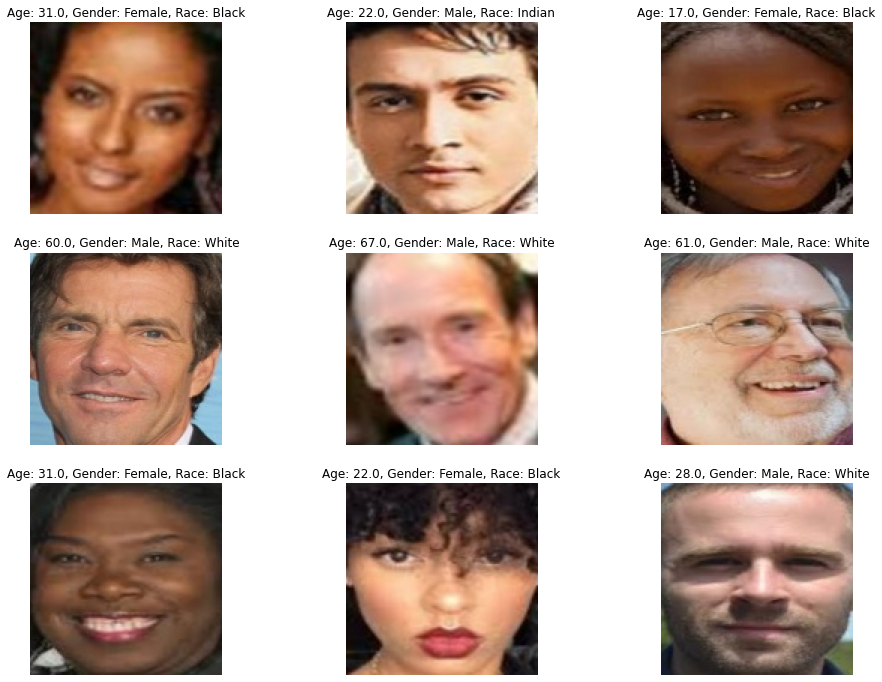

In [47]:
indexs = np.random.choice(df_utk.shape[0], size = 9, replace = False)

tmp_df = df_utk.iloc[indexs]
image_ids = tmp_df["file_name"].values
labels = tmp_df[['age', 'gender', 'race']].values

visualize_batch(image_ids, labels)

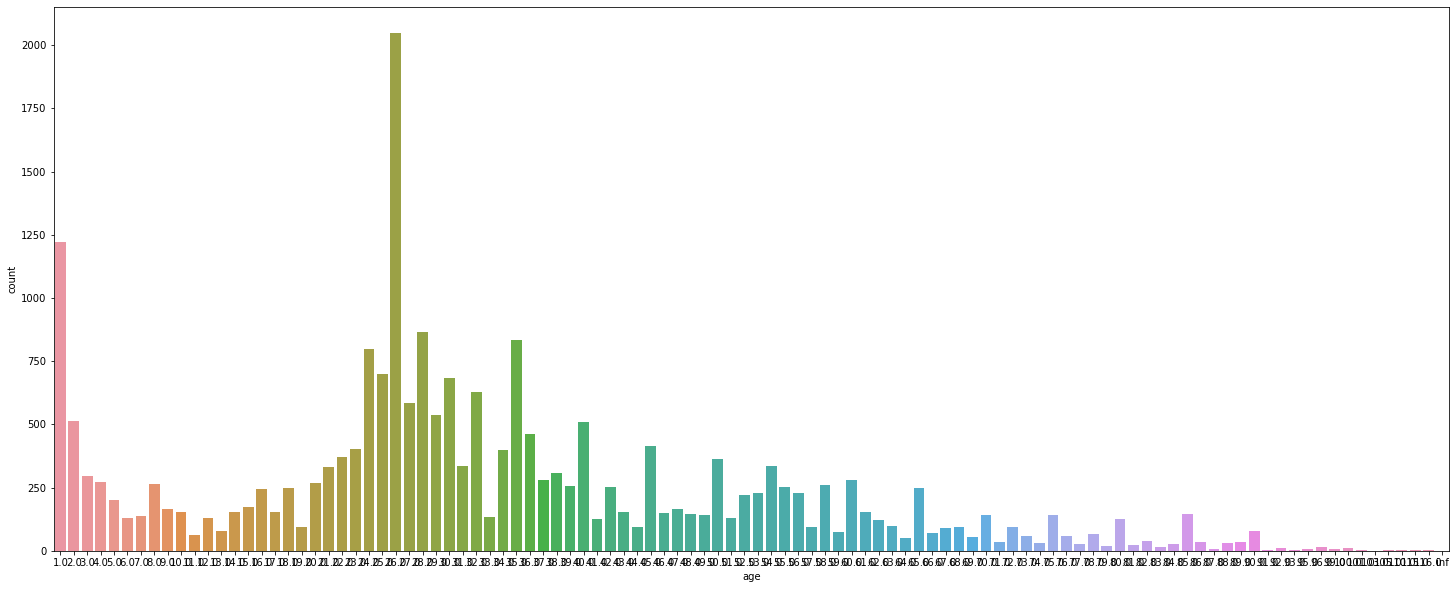

In [55]:
plt.figure(figsize=(25, 10))
sns.countplot(x="age", data=df_utk);

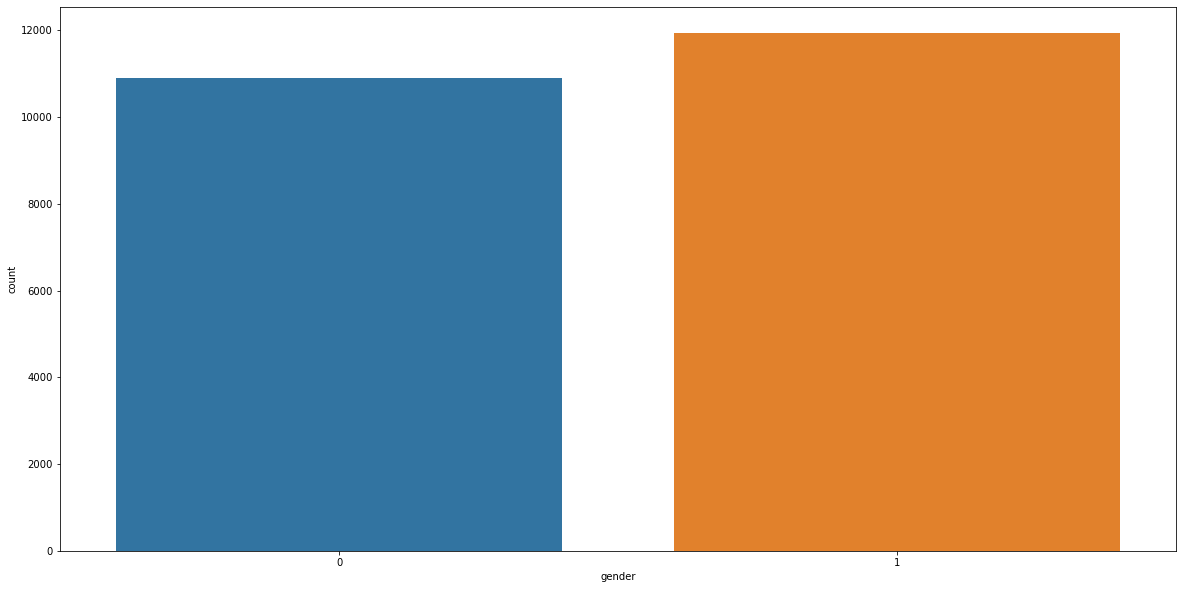

In [56]:
plt.figure(figsize=(20, 10))
sns.countplot(x="gender", data=df_utk);

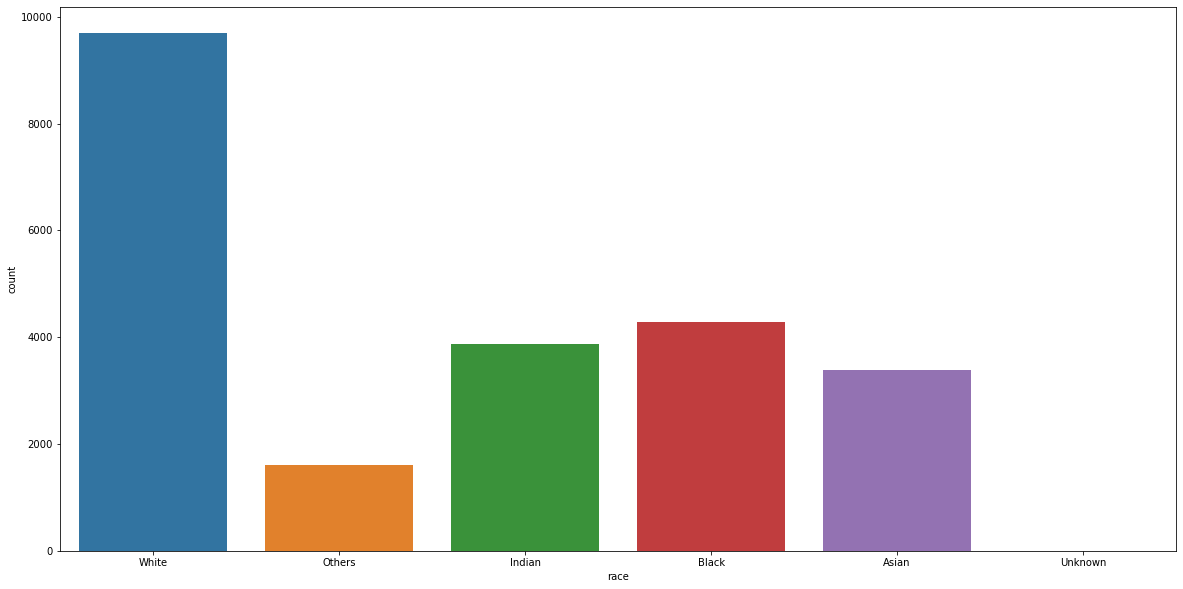

In [57]:
plt.figure(figsize=(20, 10))
sns.countplot(x="race", data=df_utk);

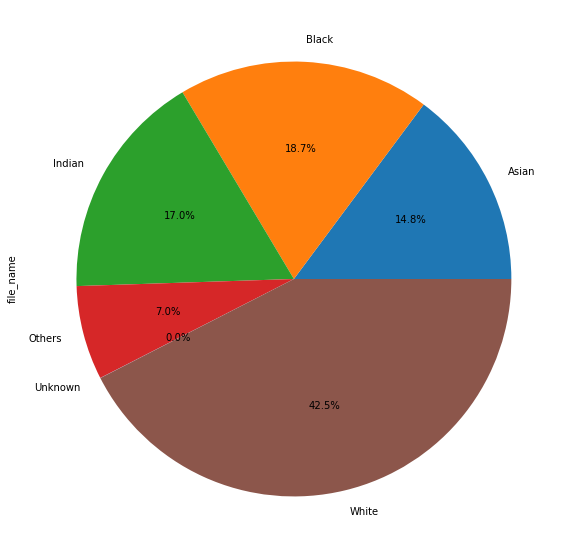

In [64]:
plt.figure(figsize=(10, 10))
race_df = df_utk.groupby('race').count()['file_name']
race_df.plot.pie(autopct="%.1f%%");